In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Task 1 

In [2]:
data_df = pd.read_csv('task-1.csv')
print('Data shape:', data_df.shape)
data_df.head()

Data shape: (50, 2)


,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [3]:
x=data_df.x.values
y=data_df.y.values
print('x,y:', x.shape, y.shape)

x,y: (50,) (50,)


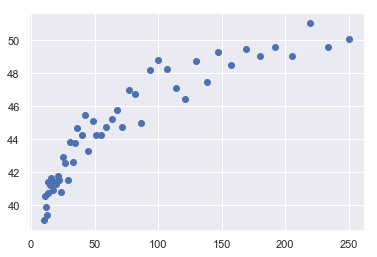

In [4]:
plt.scatter(x,y)
plt.show()

#### Fit the equation using polyfit() and print the a, b parameters

In [5]:
coefs = np.polyfit(np.log(x), y, deg=1)
print('a, b parameters:', coefs)

a, b parameters: [ 3.390241   31.52920122]


#### Plot your model with the 50 data points, i.e., the curve that corresponds to the equation from above

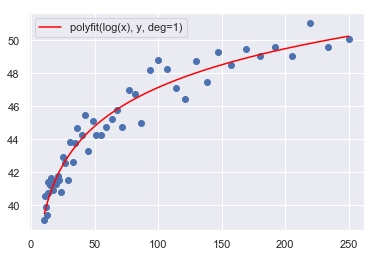

In [6]:
x_values = np.linspace(x.min(), x.max(), num=100)
y_values = np.polyval(coefs, np.log(x_values))

plt.scatter(x,y)
plt.plot(x_values, y_values, color='red', label='polyfit(log(x), y, deg=1)')
plt.legend()
plt.show()

#### Compute and print the R2 coefficient using Numpy

In [7]:

def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

y_pred = np.polyval(coefs, np.log(x))
rss_model = RSS (y, y_pred)
rss_baseline = RSS(y, y.mean())
print('rss_model, rss_baseline:', rss_model, rss_baseline)

R2 = 1 - (rss_model/rss_baseline)
print('R2:', R2)

rss_model, rss_baseline: 31.842651752756687 541.1432872199999
R2: 0.9411567093138288


#### Explain how the polyfit() function finds the optimal parameters (1-2 sentences)

Polyfit function fits the function which minimizes squared error and returns coefficients of this function

#### Give two differences between this method and the gradient descent one. Write a short sentence for each one.
1.Gradient descend uses gradient to minimize cost function. Polyfit function minimizes squared error.
<br>
2.Gradient descent is iterative algorithm. It takes small steps in the opposite direction of the gradient. At each iteration it computes parameters (a,b) and updates them with a learning rate. 

# Task 2

#### Load and split  the data into 80-20 train/test using train_test_split(random_state=0)

In [8]:
data_df2 = pd.read_csv('task-2.csv')
print('Data shape:', data_df2.shape)
data_df2.head()

Data shape: (1000, 4)


,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [9]:
X = data_df2.drop(['y'], axis=1).values
y = data_df2.y.values

In [10]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=0)
print('Train set shape:', X_tr.shape, y_tr.shape)
print('Test set shape:', X_te.shape, y_te.shape)

Train set shape: (800, 3) (800,)
Test set shape: (200, 3) (200,)


#### Fit linear regression without removing outliers. Print the mean absolute error (MAE) on the test set.

In [11]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr, y_tr)

y_pred = lr.predict(X_te)

def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

mae = MAE(y_te, y_pred)
print ('MAE:{:.2f}'.format(mae))

MAE:104.79


#### Remove outliers and compare the results. What is the new test MAE?

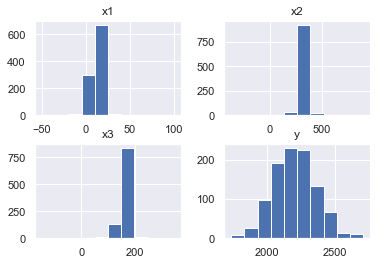

In [12]:
data_df2.hist()
plt.show()

In [13]:
from scipy import stats
df = data_df2[(np.abs(stats.zscore(data_df2)) < 3).all(axis=1)]
df.shape

#with z-score <3 there are 46 outliers in data set

(953, 4)

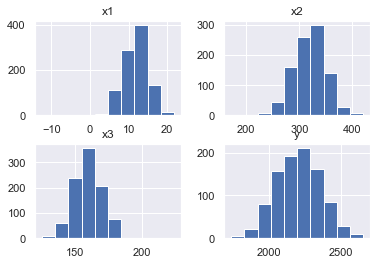

In [14]:
df.hist()
plt.show()
# data are now close to normal distribution

In [15]:
#new data set wihout outliers
X_o = df.drop(['y'], axis=1).values
y_o = df.y.values

X_tr_o, X_te_o, y_tr_o, y_te_o = train_test_split(X_o, y_o, train_size = 0.8, test_size = 0.2, random_state=0)
print('Train set shape:', X_tr_o.shape, y_tr_o.shape)
print('Test set shape:', X_te_o.shape, y_te_o.shape)

lr.fit(X_tr_o, y_tr_o)
y_pred_o = lr.predict(X_te_o)

mae_o = MAE(y_te_o, y_pred_o)
print('New test MAE without outliers:', mae_o)

Train set shape: (762, 3) (762,)
Test set shape: (191, 3) (191,)
New test MAE without outliers: 58.63281457322418


#### Fit linear regression with Huber loss. Print MAE on the test set.

In [16]:
from sklearn.linear_model import HuberRegressor

lr_huber = HuberRegressor()
lr_huber.fit(X_tr, y_tr)

y_pred_huber = lr_huber.predict(X_te)
mae_hub = MAE(y_te, y_pred_huber)
print('MAE huber loss:', mae_hub)

MAE huber loss: 83.90812396864598


# Task 3

In [17]:
data_df3 = pd.read_csv('task-3.csv')
print('data shape', data_df3.shape)
data_df3.head()

data shape (50, 2)


,x,y
0,3.588,0.473
1,3.551,0.784
2,3.610,0.847
3,3.704,0.904
4,3.716,1.118


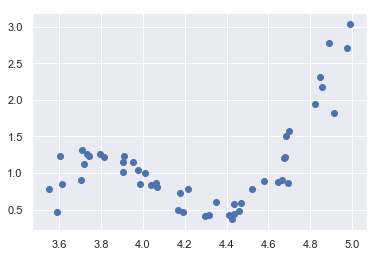

In [18]:
plt.scatter(data_df3.x, data_df3.y)
plt.show()

### Split data into 50-50 train/test set

In [19]:
#Extract x/y data
x = data_df3.x.values
y = data_df3.y.values

#Split into train/test set
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = 0.5, test_size = 0.5, random_state=0)

print('Train set:', x_tr.shape, y_tr.shape)
print('Test set:', x_te.shape, y_te.shape)

Train set: (25,) (25,)
Test set: (25,) (25,)


### Fit a polynomial of degree 10 to the train set. Print its residual sum of squares (RSS) on the train/test sets. Does your model overfit?

In [20]:
from sklearn.preprocessing import PolynomialFeatures

#Create the polynomial features
pf_obj = PolynomialFeatures(degree = 10, include_bias=False)
X_poly_tr = pf_obj.fit_transform(x_tr[:, np.newaxis])

print ('Shape:', X_poly_tr.shape)
print ('Features:', pf_obj.get_feature_names())

Shape: (25, 10)
Features: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


In [21]:
#Linear regression
lr = LinearRegression()
lr.fit(X_poly_tr, y_tr)

y_pred_tr = lr.predict(X_poly_tr)

def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))
                  
rss_tr = RSS(y_tr, y_pred_tr)
print ('RSS, train set:{:.2f}'.format(rss_tr))

X_poly_te = pf_obj.fit_transform(x_te[:, np.newaxis])
y_pred_te = lr.predict(X_poly_te)

rss_te = RSS(y_te, y_pred_te)
print ('RSS, test set:{:.2f}'.format(rss_te))

#there is a big difference between RSS of train set and test set, it means that model overfits


RSS, train set:0.68
RSS, test set:1.51


### Plot model with data points

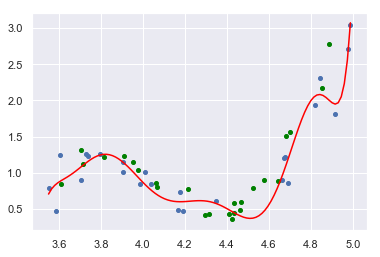

In [22]:
x_values = np.linspace(min(x), max(x), num=100)
x_values2 = pf_obj.transform(x_values[:, np.newaxis])
y_values = lr.predict(x_values2)

plt.scatter(x_tr,y_tr, s=16, label = 'train set')
plt.scatter(x_te, y_te, color='green', s=16, label = 'test set')
plt.plot(x_values, y_values, color='red')
plt.show()

### Apply regularization using ridge regression. Tune the regularization strength using grid search

In [23]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3, 3, num=20)

train_scores = []
test_scores = []


for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly_tr, y_tr)
    
    y_pred_tr_ridge = ridge.predict(X_poly_tr)
    train_rss = RSS(y_tr, y_pred_tr_ridge)
    train_scores.append(train_rss)
    
    y_pred_te_ridge = ridge.predict(X_poly_te)
    test_rss = RSS (y_te, y_pred_te_ridge)
    test_scores.append(test_rss)

C:\Users\User1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.243783e-18
  overwrite_a=True).T
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.669758e-18
  overwrite_a=True).T
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.791333e-18
  overwrite_a=True).T
C:\Users\User1\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.079403e-17
  overwrite_a=True).T
C:\Users

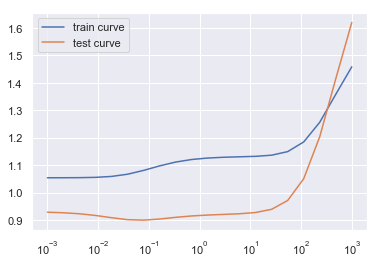

In [24]:
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [25]:
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
best_scores = test_scores[idx]

print('Best alpha value {:.1e} with score {:.2f}'.format(best_alpha, best_scores))


Best alpha value 7.8e-02 with score 0.90


### Compute the train/test RSS of tuned ridge regression model and plot the new curve

Ridge regression train:1.08
Ridge regression test:0.90


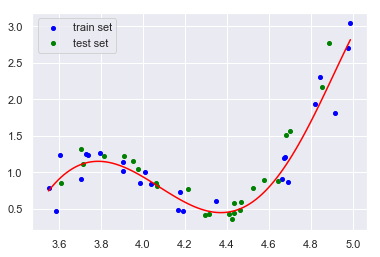

In [26]:
#tuned ridge regression
ridge_reg = Ridge(alpha = best_alpha)
ridge_reg.fit(X_poly_tr, y_tr)

y_pred_tr_ridge = ridge_reg.predict(X_poly_tr)
rss_ridge_tr = RSS (y_tr, y_pred_tr_ridge)
print('Ridge regression train:{:.2f}'.format(rss_ridge_tr))

y_pred_te_ridge = ridge_reg.predict(X_poly_te)
rss_ridge_te = RSS (y_te, y_pred_te_ridge)
print('Ridge regression test:{:.2f}'.format(rss_ridge_te))

#plot the new curve
y_values_ridge = ridge_reg.predict(x_values2)
plt.scatter(X_poly_tr[:,0], y_tr, s=16, label = 'train set', color ='blue')
plt.scatter(X_poly_te[:,0], y_te, s=16, label = 'test set', color ='green')
plt.plot(x_values, y_values_ridge, color = 'red' )
plt.legend()
plt.show()
